<a
href="https://colab.research.google.com/github/wingated/cs474_labs_f2019/blob/master/DL_Lab6.ipynb"
  target="_parent">
  <img
    src="https://colab.research.google.com/assets/colab-badge.svg"
    alt="Open In Colab"/>
</a>

# RNN & GRU

In [1]:
! wget -O ./text_files.tar.gz 'https://piazza.com/redirect/s3?bucket=uploads&prefix=attach%2Fjlifkda6h0x5bk%2Fhzosotq4zil49m%2Fjn13x09arfeb%2Ftext_files.tar.gz'
! tar -xzf text_files.tar.gz
! pip install unidecode
! pip install torch
! pip install colorama

import unidecode
import string
import random

all_characters = string.printable
n_characters = len(all_characters)
file = unidecode.unidecode(open('./text_files/lotr.txt').read())
file_len = len(file)
print('file_len =', file_len)

--2024-02-18 05:08:48--  https://piazza.com/redirect/s3?bucket=uploads&prefix=attach%2Fjlifkda6h0x5bk%2Fhzosotq4zil49m%2Fjn13x09arfeb%2Ftext_files.tar.gz
Resolving piazza.com (piazza.com)... 3.215.61.73, 35.174.203.227, 23.22.156.213, ...
Connecting to piazza.com (piazza.com)|3.215.61.73|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-uploads.piazza.com/attach/jlifkda6h0x5bk/hzosotq4zil49m/jn13x09arfeb/text_files.tar.gz [following]
--2024-02-18 05:08:48--  https://cdn-uploads.piazza.com/attach/jlifkda6h0x5bk/hzosotq4zil49m/jn13x09arfeb/text_files.tar.gz
Resolving cdn-uploads.piazza.com (cdn-uploads.piazza.com)... 13.249.141.91, 13.249.141.20, 13.249.141.26, ...
Connecting to cdn-uploads.piazza.com (cdn-uploads.piazza.com)|13.249.141.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1533290 (1.5M) [application/x-gzip]
Saving to: ‘./text_files.tar.gz’

./text_files.tar.gz 100%[===================>]   1.46M  --.-KB/s   

In [2]:
chunk_len = 200

def random_chunk():
  start_index = random.randint(0, file_len - chunk_len)
  end_index = start_index + chunk_len + 1
  return file[start_index:end_index]

print(random_chunk())

ad? 

ft f 

'Now, Mr. Frodo,' said Sam, 'you shouldn't make fun. I was serious. ' 

'So was I,' said Frodo, 'and so I am. We're going on a bit too fast. 

You and I, Sam, are still stuck in the worst 


In [3]:
import torch
# Turn string into list of longs
def char_tensor(string):
  tensor = torch.zeros(len(string)).long()
  for c in range(len(string)):
      tensor[c] = all_characters.index(string[c])
  return tensor

print(char_tensor('abcDEF'))

tensor([10, 11, 12, 39, 40, 41])


In [4]:
assert torch.cuda.is_available()
print(torch.cuda.get_device_name(0))

Tesla T4


In [6]:
import torch
import torch.nn as nn
from tqdm import tqdm
from colorama import init, Fore

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, n_layers=1):
        super(RNN, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.n_layers = n_layers

        self.gru = nn.GRU(input_size, hidden_size, n_layers)
        self.out = nn.Linear(hidden_size, output_size)

    def forward(self, input_seq, hidden):

        output, hidden = self.gru(input_seq, hidden)
        out_decoded = self.out(output)

        return out_decoded, hidden

    def init_hidden(self):
        # Initialize hidden state with zeros
        return torch.zeros(self.n_layers, 1, self.hidden_size)


In [7]:
def random_training_set():
  chunk = random_chunk()
  inp = char_tensor(chunk[:-1]) # this takes every char except the last in the chunk
  target = char_tensor(chunk[1:]) # this takes every char except the first in the chunk
  return inp, target # comparing the indicies, target will be the inputs correct output
inp, target = random_training_set()
print(inp)
print(target)

tensor([18, 27, 94, 28, 24, 23, 94, 24, 15, 94, 39, 14, 23, 14, 29, 17, 24, 27,
        94, 11, 14, 14, 23, 94, 16, 24, 23, 14, 94, 96, 28, 14, 14, 20, 18, 23,
        16, 94, 10, 23, 94, 10, 23, 28, 32, 14, 27, 73, 94, 10, 23, 13, 94, 29,
        17, 14, 94, 17, 24, 27, 28, 14, 94, 29, 17, 10, 29, 94, 32, 14, 94, 21,
        14, 23, 29, 94, 17, 18, 22, 94, 12, 10, 22, 14, 94, 11, 10, 12, 20, 94,
        27, 18, 13, 14, 27, 21, 14, 28, 28, 75, 94, 58, 17, 10, 29, 94, 96, 13,
        24, 24, 22, 94, 13, 24, 94, 34, 24, 30, 94, 11, 27, 18, 23, 16, 94, 24,
        30, 29, 94, 24, 15, 94, 29, 17, 14, 94, 49, 24, 27, 29, 17, 82, 68, 94,
        96, 96, 68, 55, 17, 14, 94, 13, 24, 24, 22, 94, 24, 15, 94, 12, 17, 24,
        18, 12, 14, 73, 68, 94, 28, 10, 18, 13, 94, 36, 27, 10, 16, 24, 27, 23,
        75, 94, 68, 60, 24, 30, 94, 22, 10, 34, 94, 28, 10, 34, 94, 29, 17, 18,
        28, 94])
tensor([27, 94, 28, 24, 23, 94, 24, 15, 94, 39, 14, 23, 14, 29, 17, 24, 27, 94,
        11, 14, 14, 23,

In [8]:
def train(inp, target):
    
    decoder_optimizer.zero_grad()
    hidden = decoder.init_hidden()
    loss = 0

    #adding all of these to the gpu
    inp = inp.cuda()
    target = target.cuda()
    hidden = hidden.cuda()

    #encoding the input
    inp_onehot = torch.nn.functional.one_hot(inp, num_classes=n_characters).float()
    inp_onehot = inp_onehot.view(-1, 1, n_characters)

    output, hidden = decoder(inp_onehot, hidden)

    target = target.view(-1)

    # loss
    loss = criterion(output.view(-1, n_characters), target)

    # backprop weights
    loss.backward()
    decoder_optimizer.step()

    return loss.item() / len(inp)


In [9]:
def sample_outputs(output, temperature):
    """Takes in a vector of unnormalized probability weights and samples a character from the distribution"""
    # As temperature approaches 0, this sampling function becomes argmax (no randomness)
    # As temperature approaches infinity, this sampling function becomes a purely random choice
    return torch.multinomial(torch.exp(output / temperature), 1)

def evaluate(prime_str='A', predict_len=100, temperature=0.8):
    ## initialize hidden state, initialize other useful variables

    hidden = decoder.init_hidden()
    prime_input = char_tensor(prime_str)
    pred_str = prime_str # predicted string that will be added onto

    prime_input_onehot = torch.nn.functional.one_hot(prime_input, num_classes=n_characters).float()
    prime_input_onehot = prime_input_onehot.view(-1, 1, n_characters)

    output, hidden = decoder(prime_input_onehot.cuda(), hidden.cuda())

    input = prime_input[-1].unsqueeze(0)
    input = torch.nn.functional.one_hot(input, num_classes=n_characters).float()
    input = input.view(-1, 1, n_characters)

    for i in range(predict_len):

        output, hidden = decoder(input.cuda(), hidden.cuda())

        output = output.squeeze(1)

        best = sample_outputs(output, temperature)
        predicted_char = string.printable[best]
        pred_str += predicted_char
        input = char_tensor(predicted_char)
        input = torch.nn.functional.one_hot(input, num_classes=n_characters).float()
        input = input.view(-1, 1, n_characters)

    return pred_str




In [10]:
import time
n_epochs = 5000
print_every = 200
plot_every = 10
hidden_size = 200
n_layers = 3
lr = 0.001

decoder = RNN(n_characters, hidden_size, n_characters, n_layers)
decoder = decoder.cuda()
decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

all_losses = []
loss_avg = 0

In [11]:
# n_epochs = 2000
start = time.time()

for epoch in range(1, n_epochs + 1):
  loss_ = train(*random_training_set())
  loss_avg += loss_

  if epoch % print_every == 0:
      init()
      print()
      print('-'*100)
      print(f'Elapsed Time: {round(time.time()-start,1)}s  Epoch: {epoch} Loss: {round(loss_avg, 5)} Percent Complete: {(epoch/n_epochs)*100}%\n')
      print(Fore.GREEN + evaluate('Wh', 100) + Fore.RESET)
      print('-'*100)
      print()

  if epoch % plot_every == 0:
      all_losses.append(loss_avg / plot_every)
      loss_avg = 0



----------------------------------------------------------------------------------------------------
Elapsed Time: 6.9s  Epoch: 200 Loss: 0.15471 Percent Complete: 4.0%

Whe mag lts  tl  iawa a ahsvtn tee  
 in ea
ti lei iist  oernl n tdia  oashrayw niga oooaohoia i m nd 
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
Elapsed Time: 13.2s  Epoch: 400 Loss: 0.12117 Percent Complete: 8.0%

Wholgat ito to Bod lasdere is ersele sillerm nee the srnin the nan as sallat an wall op foud he beald 
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
Elapsed Time: 18.4s  Epoch: 600 Loss: 0.10838 Percent Complete: 12.0%

Why, ibowe the gode thend rort my the ptome fofe houl greegor. He thattey 

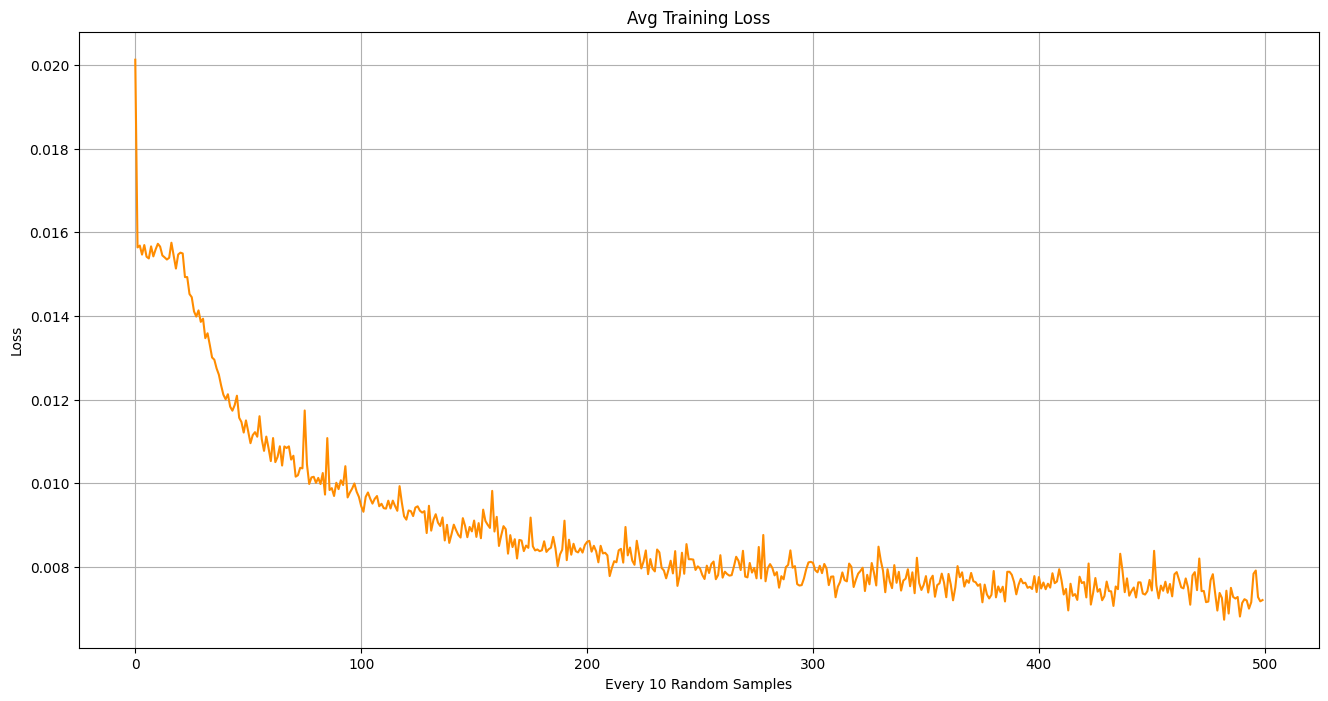

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(range(len(all_losses)),all_losses, color='darkorange')
plt.title('Avg Training Loss')
plt.xlabel('Every 10 Random Samples')
plt.ylabel('Loss')
plt.grid()
plt.show()

In [13]:
for i in range(10):
  start_strings = [" Th", " wh", " he", " I ", " ca", " G", " lo", " ra"]
  start = random.randint(0,len(start_strings)-1)
  print(start_strings[start])
  print(evaluate(start_strings[start], 200), '\n')

 wh
 whards,' said Sam. 'I 
will feet was to find for a glisk mure to terried, and small lay to 
make get their more wouldn't pans at the road, and go had brow where the in the 
mountage. I recames, low by w 

 wh
 whar when the streps of 
the end-earth on the veating of the king of the old to tower 
laid and seet of the ran of stars of wall, and repilous to 
then such on the learnly was much of the there ond bear 

 I 
 I not back that, if the Noot on the spreading of Markne still, 
land set, and with way now the ssake. 

In the noon of prace obthing of the wood, winting with then evel 
had for a far fallen that waves  

 he
 hed and now to go for it. 

They dark their world back to the Gadded place; but on edge 
with Lord and long break waining seace the foot in the Tunning in still over eaght 
out on. Then walked to first  

 lo
 loked out of this marsion. It was as only 
coming us, it become his arm. Well stood not not peet, and he must it lated 
---went a going an isoutings wood. 

## Attempt to Create a Trump Tweet Generator


In [14]:
!wget https://raw.githubusercontent.com/mkearney/trumptweets/master/data/trumptweets-1515775693.tweets.csv

--2024-02-18 05:11:25--  https://raw.githubusercontent.com/mkearney/trumptweets/master/data/trumptweets-1515775693.tweets.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12913888 (12M) [text/plain]
Saving to: ‘trumptweets-1515775693.tweets.csv.1’

trumptweets-1515775 100%[===================>]  12.32M  --.-KB/s    in 0.1s    

2024-02-18 05:11:26 (119 MB/s) - ‘trumptweets-1515775693.tweets.csv.1’ saved [12913888/12913888]



In [15]:
import pandas as pd
df = pd.read_csv('/content/trumptweets-1515775693.tweets.csv')
text = df[['text']]
with open('trump_tweets.txt', 'w') as f:
  for i in range(len(text)):
    f.write(text.iloc[i,0] + '\n')

<ipython-input-15-41afbabee6d0>:2: DtypeWarning: Columns (15,30,31,32,36,37,38,42,43,44,45,46,47,50,51,52,56,57,58,59,60,61,62,63,64,65,66,67) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/trumptweets-1515775693.tweets.csv')


In [16]:
all_characters = string.printable
n_characters = len(all_characters)
file = unidecode.unidecode(open('./trump_tweets.txt').read())
file_len = len(file)
print('file_len =', file_len)

file_len = 3665026


In [17]:
chunk_len = 200

def random_chunk():
  start_index = random.randint(0, file_len - chunk_len)
  end_index = start_index + chunk_len + 1
  return file[start_index:end_index]

print(random_chunk())

uy  Great idea re minute of silence tonight--thank you.
@NYClights420   I hope so!
@RonCharles @VanityFair @KBAndersen  Which magazine went bust under Carter and as I predicted!
@trondbertil Thank you.


In [22]:
import time
n_epochs = 6000
print_every = 200
plot_every = 10
hidden_size = 200
n_layers = 3
lr = 0.001

decoder = RNN(n_characters, hidden_size, n_characters, n_layers)
decoder = decoder.cuda()
decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

all_losses = []
loss_avg = 0

In [23]:
# n_epochs = 2000
start = time.time()

for epoch in range(1, n_epochs + 1):
  loss_ = train(*random_training_set())
  loss_avg += loss_

  if epoch % print_every == 0:
      print()
      print('-'*100)
      print(f'Elapsed Time: {round(time.time()-start,1)}s  Epoch: {epoch} Loss: {round(loss_avg, 5)} Percent Complete: {(epoch/n_epochs)*100}%\n')
      print(evaluate('Wh', 100))
      print('-'*100)
      print()

  if epoch % plot_every == 0:
      all_losses.append(loss_avg / plot_every)
      loss_avg = 0


----------------------------------------------------------------------------------------------------
Elapsed Time: 4.0s  Epoch: 200 Loss: 0.15238 Percent Complete: 3.3333333333333335%

Why Belsher Wine miman, sisitem cAas
bhollenl teen rerp w c r oma an kor Trous 
@Aayan pachac cowdedyn
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
Elapsed Time: 7.3s  Epoch: 400 Loss: 0.13037 Percent Complete: 6.666666666666667%

When Roniy #Shy cios won dadk beacingrlongewe the tomed efilg yo patf yocins un mat oun fe the raming 
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
Elapsed Time: 10.7s  Epoch: 600 Loss: 0.12055 Percent Complete: 10.0%

Wh hand sed in Oreeiwer seat sowt tous cont?
S

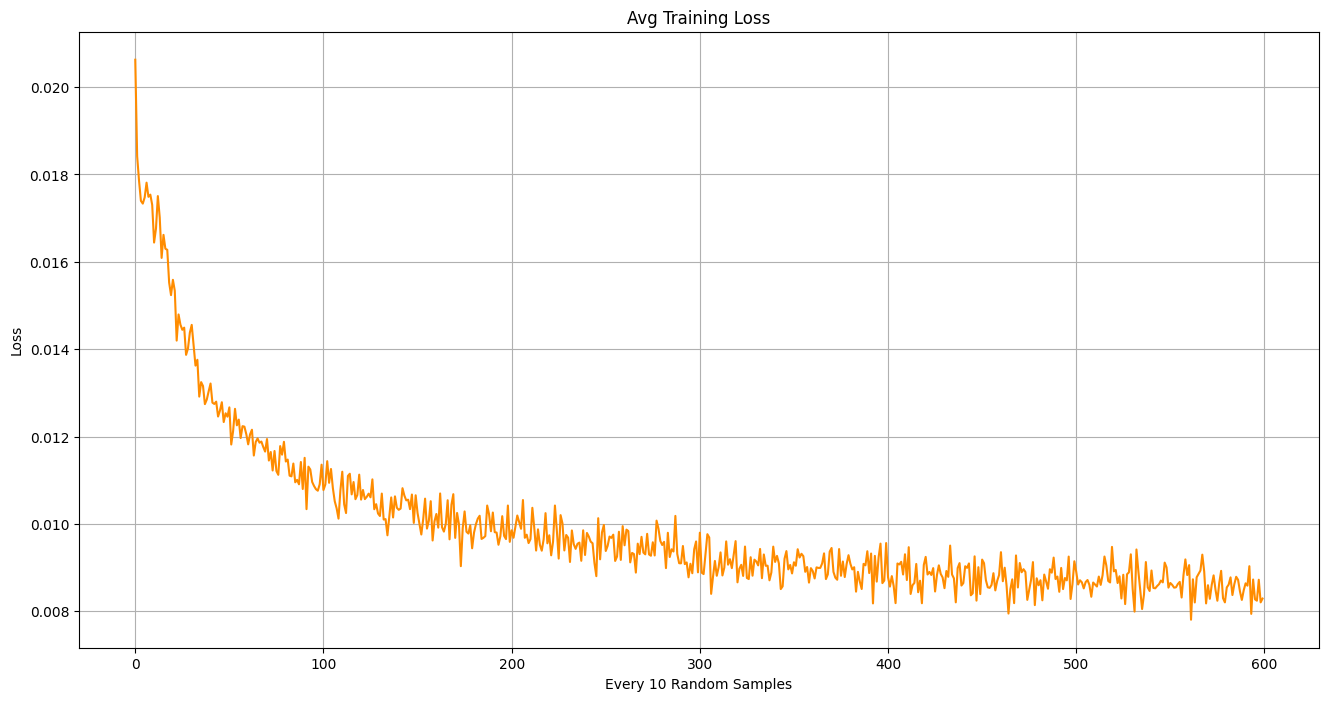

In [27]:
plt.figure(figsize=(16,8))
plt.plot(range(len(all_losses)),all_losses, color='darkorange')
plt.title('Avg Training Loss')
plt.xlabel('Every 10 Random Samples')
plt.ylabel('Loss')
plt.grid()
plt.show()

In [28]:
for i in range(10):
  start_strings = ["Ob", "Pr", " he", " I ", " @", " wa", " lo", " Ch"]
  start = random.randint(0,len(start_strings)-1)
  print(start_strings[start])
#   all_characters.index(string[c])
  print(evaluate(start_strings[start], 200), '\n')

Ob
Obulater: @realDonaldTrump is under creditelly they are beat and 50 believery, and the wroed to reluble! #Trump2016 by @doun2
#Trump2016"  (-- America just records that the luxurentice
"Tran for treat t 

 lo
 loking to want to phowe for the Very has passion........
https://t.co/3FxDVBkl3b
"@Clridatermish: @JerabHay @realDonaldTrump @AlexTurnenton has my the Mix Gaila is see "is think they keep to...
The fiil 

 wa
 wat to returner to special and deal tranding payinal with my fatulation, it at 7 member bentation in windonal for the tard it. We let is what the people to least be a losesting oppout!
States to the wan 

Ob
Oby http://t.co/1FdvnhHyb
"@realDonaldTrump @ICeninCaller http://t.co/YPFV1hRFnv
"@hmyniprow: @realdonalry to see everyone and out others to cation! http://t.co/5FEWF56tnj"
"@2015: @realDonaldTrump @stu 

 he
 he has better cark in the Cortmand for us a medials. Theed.
The watcher happered the hamps. He is lie the persuction the truth to chaim carter failings. True!
